<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP3/ML2025_MiniP3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# 1. Load dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0

# 2. Select one image per class (0-9)
selected_images = []
selected_labels = []
for class_label in range(10):
    idx = np.where(y_train == class_label)[0][0]
    selected_images.append(x_train[idx])
    selected_labels.append(class_label)

selected_images = np.array(selected_images)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


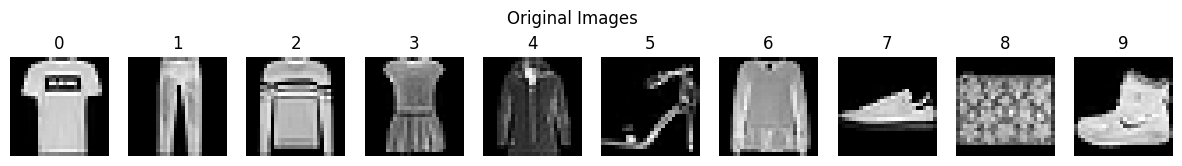

In [ ]:
# 3. Show the original images
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.axis('off')
    plt.title(str(selected_labels[i]))
plt.suptitle("Original Images")
plt.show()


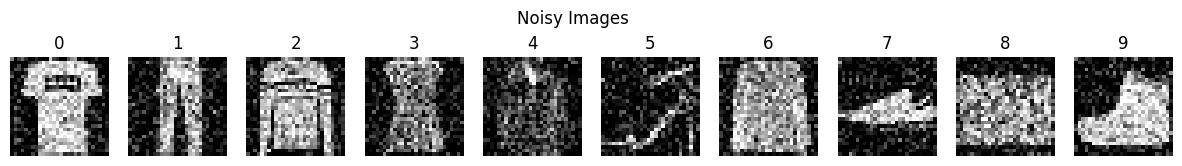

In [ ]:
# 4. Add Gaussian noise (mean=0, std=0.2)
noise = np.random.normal(loc=0.0, scale=0.2, size=selected_images.shape)
noisy_images = selected_images + noise

# 5. Clip pixel values to [0, 1]
noisy_images = np.clip(noisy_images, 0.0, 1.0)

# 6. Show the noisy images
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.axis('off')
    plt.title(str(selected_labels[i]))
plt.suptitle("Noisy Images")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca_from_scratch(X, plot=True, variance_threshold=0.90):

    X_meaned = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)

    n_components_needed = np.argmax(cumulative_variance >= variance_threshold) + 1

    if plot:
        plt.figure(figsize=(10, 4))
        plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Explained Variance')
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')
        plt.axhline(y=variance_threshold, color='green', linestyle='--', label=f'{int(variance_threshold * 100)}% threshold')
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Ratio')
        plt.title('Explained Variance by PCA Components')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return eigenvectors, explained_variance_ratio, cumulative_variance, n_components_needed


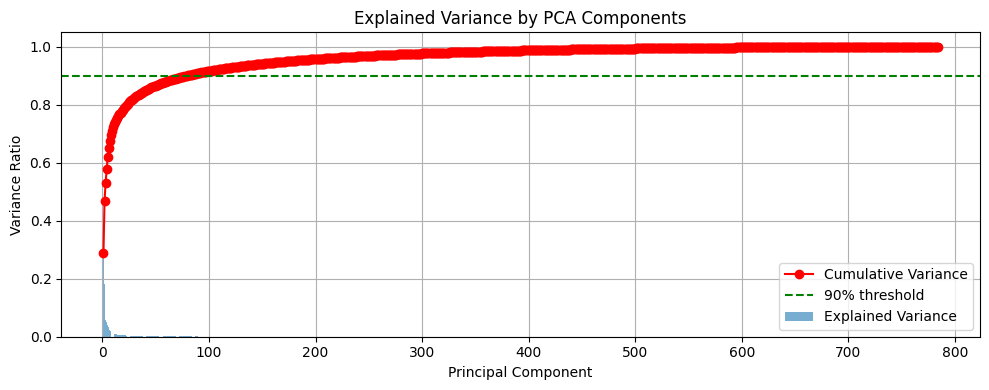

Number of components needed to retain 0.9 of variance 79


In [ ]:

(x_train, _), (_, _) = fashion_mnist.load_data()
x_subset = x_train[:5000] / 255.0
x_flat = x_subset.reshape(x_subset.shape[0], -1)

components, var_ratio, cum_var, n_needed = pca_from_scratch(x_flat)

print(f"Number of components needed to retain 0.9 of variance {n_needed}")

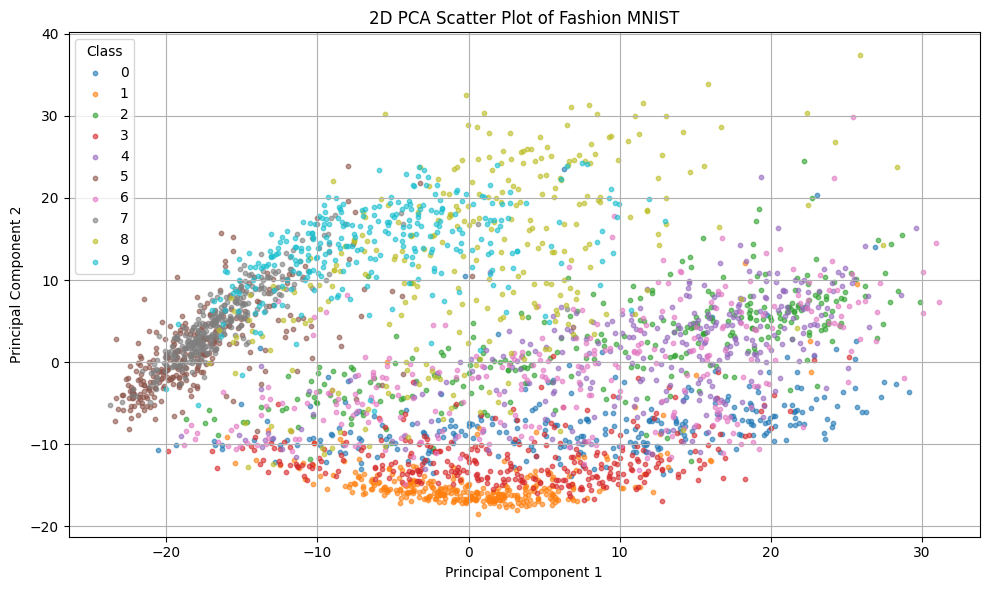

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_subset = x_train[:3000]
y_subset = y_train[:3000]

x_flat = x_subset.reshape(x_subset.shape[0], -1) / 255.0

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_flat)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
for label in np.unique(y_subset):
    indices = y_subset == label
    plt.scatter(x_pca[indices, 0], x_pca[indices, 1], label=str(label), alpha=0.6, s=10)

plt.title("2D PCA Scatter Plot of Fashion MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()


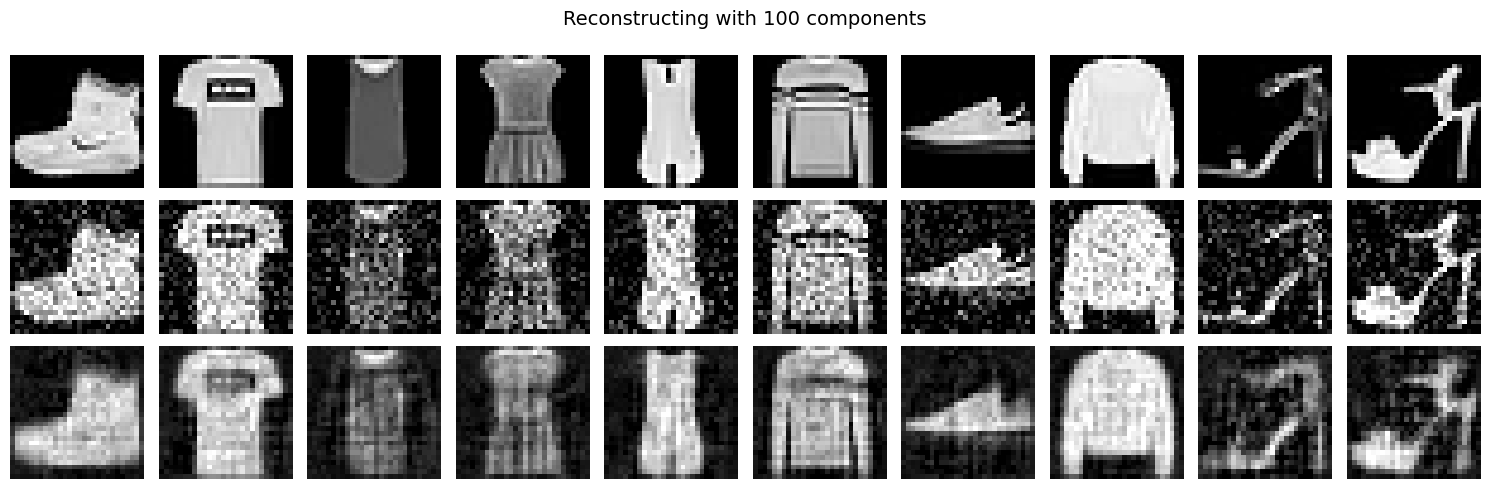

In [ ]:
noise = np.random.normal(0, 0.2, x_flat.shape)
x_noisy = x_flat + noise
x_noisy = np.clip(x_noisy, 0.0, 1.0)

pca = PCA(n_components=100)
x_noisy_pca = pca.fit_transform(x_noisy)

x_reconstructed = pca.inverse_transform(x_noisy_pca)
x_reconstructed = np.clip(x_reconstructed, 0.0, 1.0)

def plot_image_rows(originals, noisies, reconstructs):
    fig, axes = plt.subplots(3, 10, figsize=(15, 5))

    for i in range(10):
        axes[0, i].imshow(originals[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(noisies[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[2, i].imshow(reconstructs[i].reshape(28, 28), cmap='gray')
        axes[2, i].axis('off')

    axes[0, 0].set_ylabel('Main', fontsize=12)
    axes[1, 0].set_ylabel('Noisy', fontsize=12)
    axes[2, 0].set_ylabel('Reconstructed', fontsize=12)
    plt.suptitle('Reconstructing with 100 components', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_image_rows(x_flat, x_noisy, x_reconstructed)

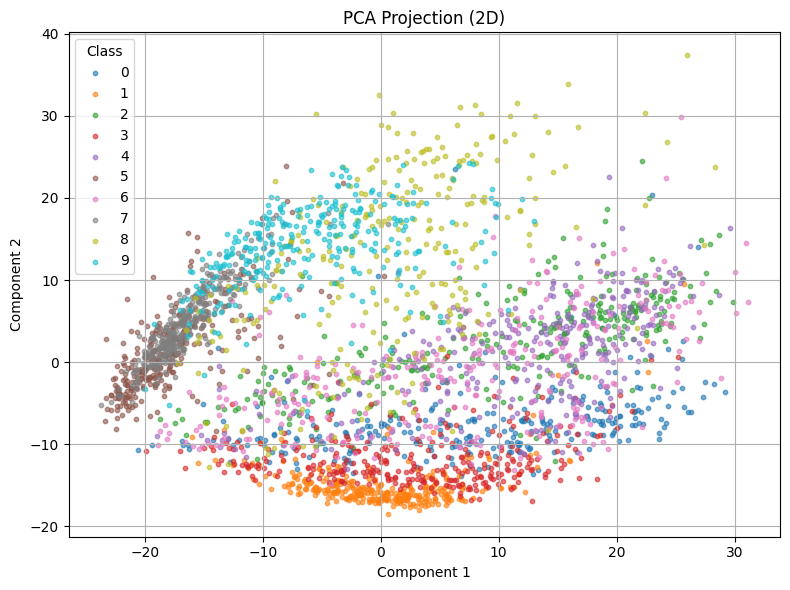

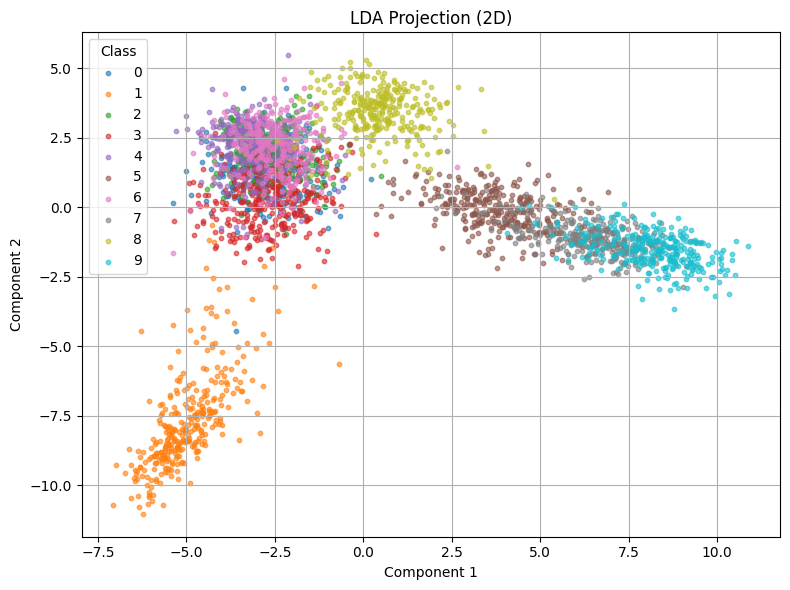

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
x_subset = x_train[:3000]
y_subset = y_train[:3000]

# 3. Flatten and normalize
x_flat = x_subset.reshape(x_subset.shape[0], -1) / 255.0

# 4. Standardize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_flat)

# 5. PCA to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# 6. LDA to 2 components
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x_scaled, y_subset)

# 7. Plot results
def plot_projection(data, labels, title):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(data[idx, 0], data[idx, 1], label=str(label), s=10, alpha=0.6)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title="Class")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_projection(x_pca, y_subset, "PCA Projection (2D)")
plot_projection(x_lda, y_subset, "LDA Projection (2D)")

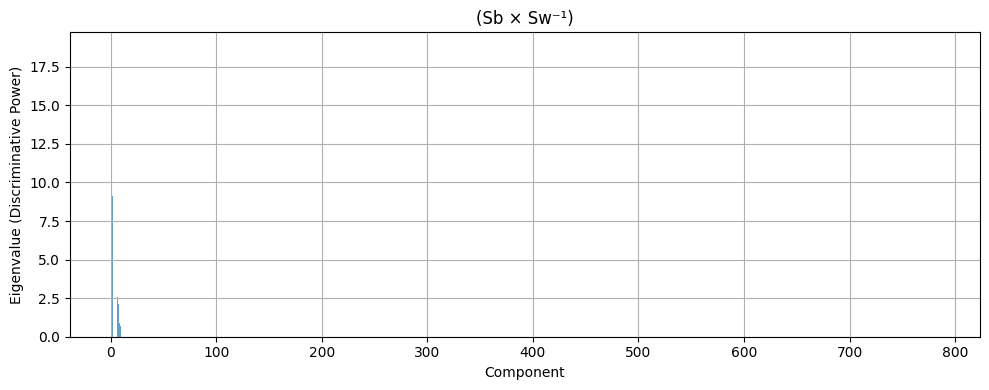

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# 1. Load a subset of Fashion MNIST
(x_train, y_train), _ = fashion_mnist.load_data()
x = x_train[:3000].reshape(3000, -1).astype(np.float32) / 255.0
y = y_train[:3000]

# 2. Standardize the data
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# 3. Compute overall mean
overall_mean = np.mean(x_std, axis=0)

# 4. Initialize Sw and Sb
n_features = x_std.shape[1]
classes = np.unique(y)
Sw = np.zeros((n_features, n_features))
Sb = np.zeros((n_features, n_features))

# 5. Compute Sw and Sb
for cls in classes:
    X_c = x_std[y == cls]
    mean_c = np.mean(X_c, axis=0)

    # Scatter within class (Sw)
    scatter_within = (X_c - mean_c).T @ (X_c - mean_c)
    Sw += scatter_within

    # Scatter between classes (Sb)
    n_c = X_c.shape[0]
    mean_diff = (mean_c - overall_mean).reshape(-1, 1)
    scatter_between = n_c * (mean_diff @ mean_diff.T)
    Sb += scatter_between

# 6. Compute J = inv(Sw) * Sb
from numpy.linalg import inv, eig

# Add regularization to Sw to avoid singular matrix
Sw_reg = Sw + np.eye(n_features) * 1e-6
J = inv(Sw_reg) @ Sb

# 7. Compute eigenvalues and sort
eigenvalues, _ = eig(J)
eigenvalues = np.real(eigenvalues)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# 8. Plot eigenvalues
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(eigenvalues_sorted)+1), eigenvalues_sorted, alpha=0.7)
plt.title("(Sb × Sw⁻¹)")
plt.xlabel("Component")
plt.ylabel("Eigenvalue (Discriminative Power)")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/pyt

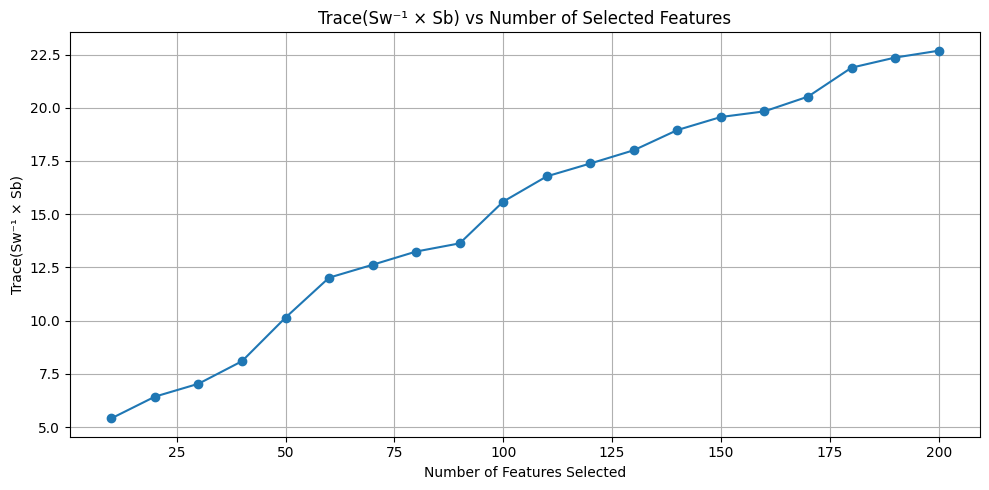

✅ بیشترین trace مربوط به انتخاب 200 ویژگی است.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from numpy.linalg import inv

# 1. Load data (subset for speed)
(x_train, y_train), _ = fashion_mnist.load_data()
X = x_train[:3000].reshape(3000, -1).astype(np.float32) / 255.0
y = y_train[:3000]

# 2. Standardize data
X_std = StandardScaler().fit_transform(X)

# 3. Initialize result list
trace_values = []
feature_range = range(10, 201, 10)  # test with 10, 20, ..., 200 features

for k in feature_range:
    # 4. Select top-k features using ANOVA F-score
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_std, y)

    # 5. Compute overall mean
    overall_mean = np.mean(X_kbest, axis=0)
    classes = np.unique(y)
    n_features = X_kbest.shape[1]

    # 6. Compute Sw and Sb
    Sw = np.zeros((n_features, n_features))
    Sb = np.zeros((n_features, n_features))

    for cls in classes:
        X_c = X_kbest[y == cls]
        mean_c = np.mean(X_c, axis=0)
        Sw += (X_c - mean_c).T @ (X_c - mean_c)

        n_c = X_c.shape[0]
        mean_diff = (mean_c - overall_mean).reshape(-1, 1)
        Sb += n_c * (mean_diff @ mean_diff.T)

    # 7. Regularize Sw and compute trace(Sw⁻¹ × Sb)
    Sw_reg = Sw + np.eye(n_features) * 1e-6
    try:
        trace_value = np.trace(inv(Sw_reg) @ Sb)
    except np.linalg.LinAlgError:
        trace_value = 0  # if matrix is singular

    trace_values.append(trace_value)

# 8. Plot trace vs number of features
plt.figure(figsize=(10, 5))
plt.plot(feature_range, trace_values, marker='o')
plt.title('Trace(Sw⁻¹ × Sb) vs Number of Selected Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Trace(Sw⁻¹ × Sb)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Find optimal number of features
optimal_k = feature_range[np.argmax(trace_values)]
print(f"✅ بیشترین trace مربوط به انتخاب {optimal_k} ویژگی است.")


<ipython-input-12-db1d794aab5f>:23: RuntimeWarning: invalid value encountered in divide
  P[i] /= np.sum(P[i])  # Normalize each row


Iteration 0, KL Divergence: 5.5312
Iteration 50, KL Divergence: nan
Iteration 100, KL Divergence: nan
Iteration 150, KL Divergence: nan
Iteration 200, KL Divergence: nan
Iteration 250, KL Divergence: nan


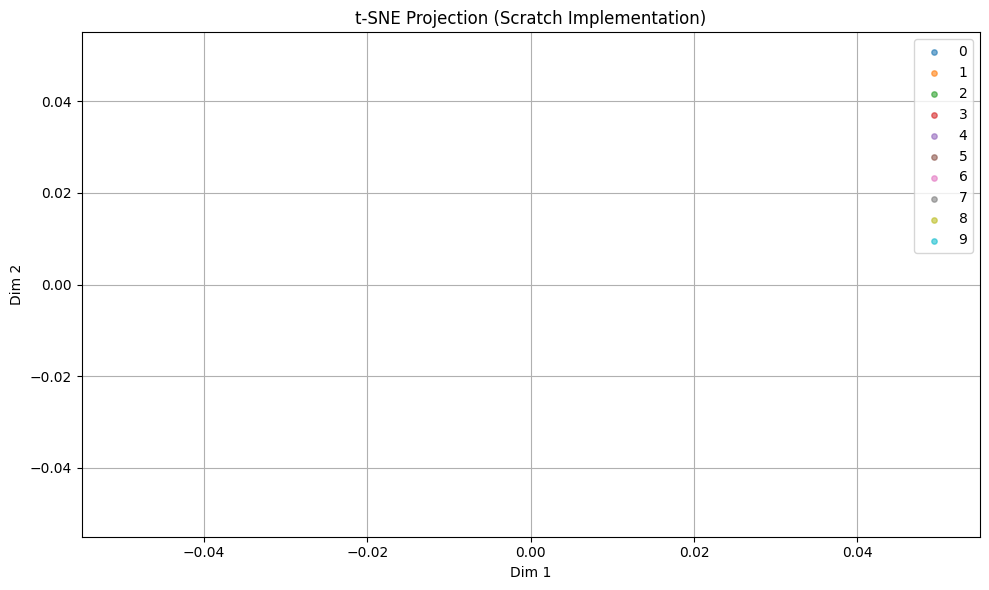

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# 1. بارگذاری داده
(x_train, y_train), _ = fashion_mnist.load_data()
x = x_train[:500].reshape(500, -1) / 255.0
y = y_train[:500]

# 2. استانداردسازی
x = StandardScaler().fit_transform(x)

# 3. تابع کمکی برای محاسبه شباهت گاوسی
def compute_gaussian_affinities(X, sigma=1.0):
    n = X.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist = np.linalg.norm(X[i] - X[j])**2
                P[i][j] = np.exp(-dist / (2 * sigma**2))
        P[i] /= np.sum(P[i])  # Normalize each row
    return (P + P.T) / (2 * n)  # Symmetrize and normalize globally

# 4. وزن‌دهی در فضای ۲ بعدی
def compute_low_dim_affinities(Y):
    n = Y.shape[0]
    Q = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist = 1 + np.linalg.norm(Y[i] - Y[j])**2
                Q[i][j] = 1 / dist
    Q /= np.sum(Q)
    return Q

# 5. KL divergence بین دو توزیع
def kl_divergence(P, Q):
    mask = (P > 1e-8)
    return np.sum(P[mask] * np.log(P[mask] / Q[mask]))

# 6. اجرای t-SNE بسیار ساده با gradient descent
def simple_tsne(X, n_components=2, iterations=300, learning_rate=100.0):
    n = X.shape[0]
    Y = np.random.randn(n, n_components) * 1e-4  # initialize low-dim coords
    P = compute_gaussian_affinities(X)

    for it in range(iterations):
        Q = compute_low_dim_affinities(Y)
        grads = np.zeros_like(Y)

        for i in range(n):
            for j in range(n):
                if i != j:
                    grad = 4 * (P[i][j] - Q[i][j]) * (Y[i] - Y[j]) / (1 + np.linalg.norm(Y[i] - Y[j])**2)
                    grads[i] += grad

        Y += learning_rate * grads

        if it % 50 == 0:
            loss = kl_divergence(P, Q)
            print(f"Iteration {it}, KL Divergence: {loss:.4f}")
    return Y

# 7. اجرای الگوریتم و رسم
Y_2d = simple_tsne(x, n_components=2, iterations=300)

plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(Y_2d[y == label, 0], Y_2d[y == label, 1], label=str(label), s=15, alpha=0.6)
plt.title("t-SNE Projection (Scratch Implementation)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
